<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/01_pytorch_workflow.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=15419)

# 01. PyTorch Workflow Fundamentals

The _essence_ of machine learning and deep learning is to take some data from the past/history, build an algorithm (like a neural network) to _discover patterns_ in it and use the discoverd patterns to _predict_ the future.

PA: Prediction in general is the primary goal in Machine Learning / Deep Learning.

There are many ways to do this and many new ways are being discovered all the time.

But let's _start small_, always.

How about we start with a straight line?

And we see if we can build a PyTorch model that learns the pattern of the straight line and matches it.

## What we're going to cover

In this module we're going to cover a standard PyTorch workflow (it can be _chopped_ and _changed as necessary_ but it covers the main _outline_ of steps).

PA: This general workflow is _analogous_ to __meta-instructions__ of Lego.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

For now, we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be _almost anything_ but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to _learn patterns_ in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model has found patterns in the data, let's _compare_ its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |


## Where can can you get help?

All of the materials for this course are [available on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

And if you run into trouble, you can ask a question on the [Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions) there too.

There's also the [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

Let's start by putting what we're covering into a dictionary to reference later.


In [ ]:
what_were_covering = {1: "data (prepare and load)", # Prepare (pre-process) the raw ingredients
    2: "build model", # The most appropriate recipe
    3: "fitting the model to data (training)", # Cook the pre-processed ingredients according to the chosen recipe
    4: "making predictions and evaluating a model (inference)", # Taste the cooked dish
    5: "saving and loading a model",
    6: "putting it all together",
}

And now let's import what we'll need for this module.

We're going to get `torch`, `torch.nn` (`nn` stands for __n__eural __n__etwork and this package contains the __building blocks__ for creating neural networks in PyTorch, in addition to `torch.tensor`) and `matplotlib`.

[`torch.nn`](https://pytorch.org/docs/stable/nn.html) contains the __basic building blocks__ for __computational graphs__. The beauty of PyTorch is that all these Lego pieces can be combined/_orchestrated_ in infinitely many different ways that can be imagined.

In [ ]:
import torch
from torch import nn # nn contains ALL of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data Preprocessing (preparing and loading)

I want to _stress_ that "__data__" in machine learning can be _almost anything_ (obviously digitalised) you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures (more complex data types e.g. graphs/networks), text and many more others.

![machine learning is a game of two parts: 1. turn your data into a representative set of numbers and 2. build or pick a model to learn the representation as best as possible](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)

Machine learning is a (Lego) __game__ of two parts:
1. _Turn_ your data, whatever it is, into _numbers_ (a __numerical representation__).
2. _Pick_ or _build_ a model to _learn patterns_ from the numerical representation as best as possible.

Sometimes both parts (one and two) can be done at the same time.

But what if you don't have data?

Well, that's where we're at now.

No data.

But we can create some.

Let's create our data as a straight line.

We'll use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to create the data with _known_ **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

Don't worry if the terms above don't mean much now, we'll see them in action and I'll put extra resources below where you can learn more.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

# Capital letters represent matrix/tensor whilst lower case ones represent vecor/scalar.
X = torch.arange(start, end, step).unsqueeze(dim=1) # add an extra dimension
y = weight * X + bias

X.size(), X[:10], y.shape, y[:10]

(torch.Size([50, 1]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 torch.Size([50, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
# Notice the difference `tensor.unsqueeze()` made in tensor dimensions.
# Removing `unsqueeze(dim=1)` leads to no extra pair of square brackets.
# Why we need `unsqueeze(dim=1)` will become clear when building actual neural networks.
torch.arange(start, end, step).size(), torch.arange(start, end, step).unsqueeze(dim=1).shape

(torch.Size([50]), torch.Size([50, 1]))

Beautiful! Now we're going to move towards building a model that can _learn_ the __relationship__ between `X` (**features**) and `y` (**labels**).

What might be a better way, hint, to visualize it? What's our data explorer's motto?

### Split data into training and test sets (One of the most important concets in ML in general)

We've got some data.

But before we build a model we need to split it up.

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set). This is possibly the number one thing you need to be aware of in machine learning (and deep learning), from data's perspective.

Each split of the dataset serves a specific purpose:

| Split | Purpose | Amount of total data | How often is it used? |
| ----- | ----- | ----- | ----- |
| **Training set** | The model learns from this data (like the _course materials_ you study during the semester). | ~60-80% | Always |
| **Validation set** | The model gets _tuned_ on this data (like the practice exam you take before the final exam). | ~10-20% | Often but not always |
| **Testing set** | The model gets _evaluated_ on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20% | Always |

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by _splitting_ our `X` and `y` tensors.

> **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate and secret from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to _unseen_ examples.


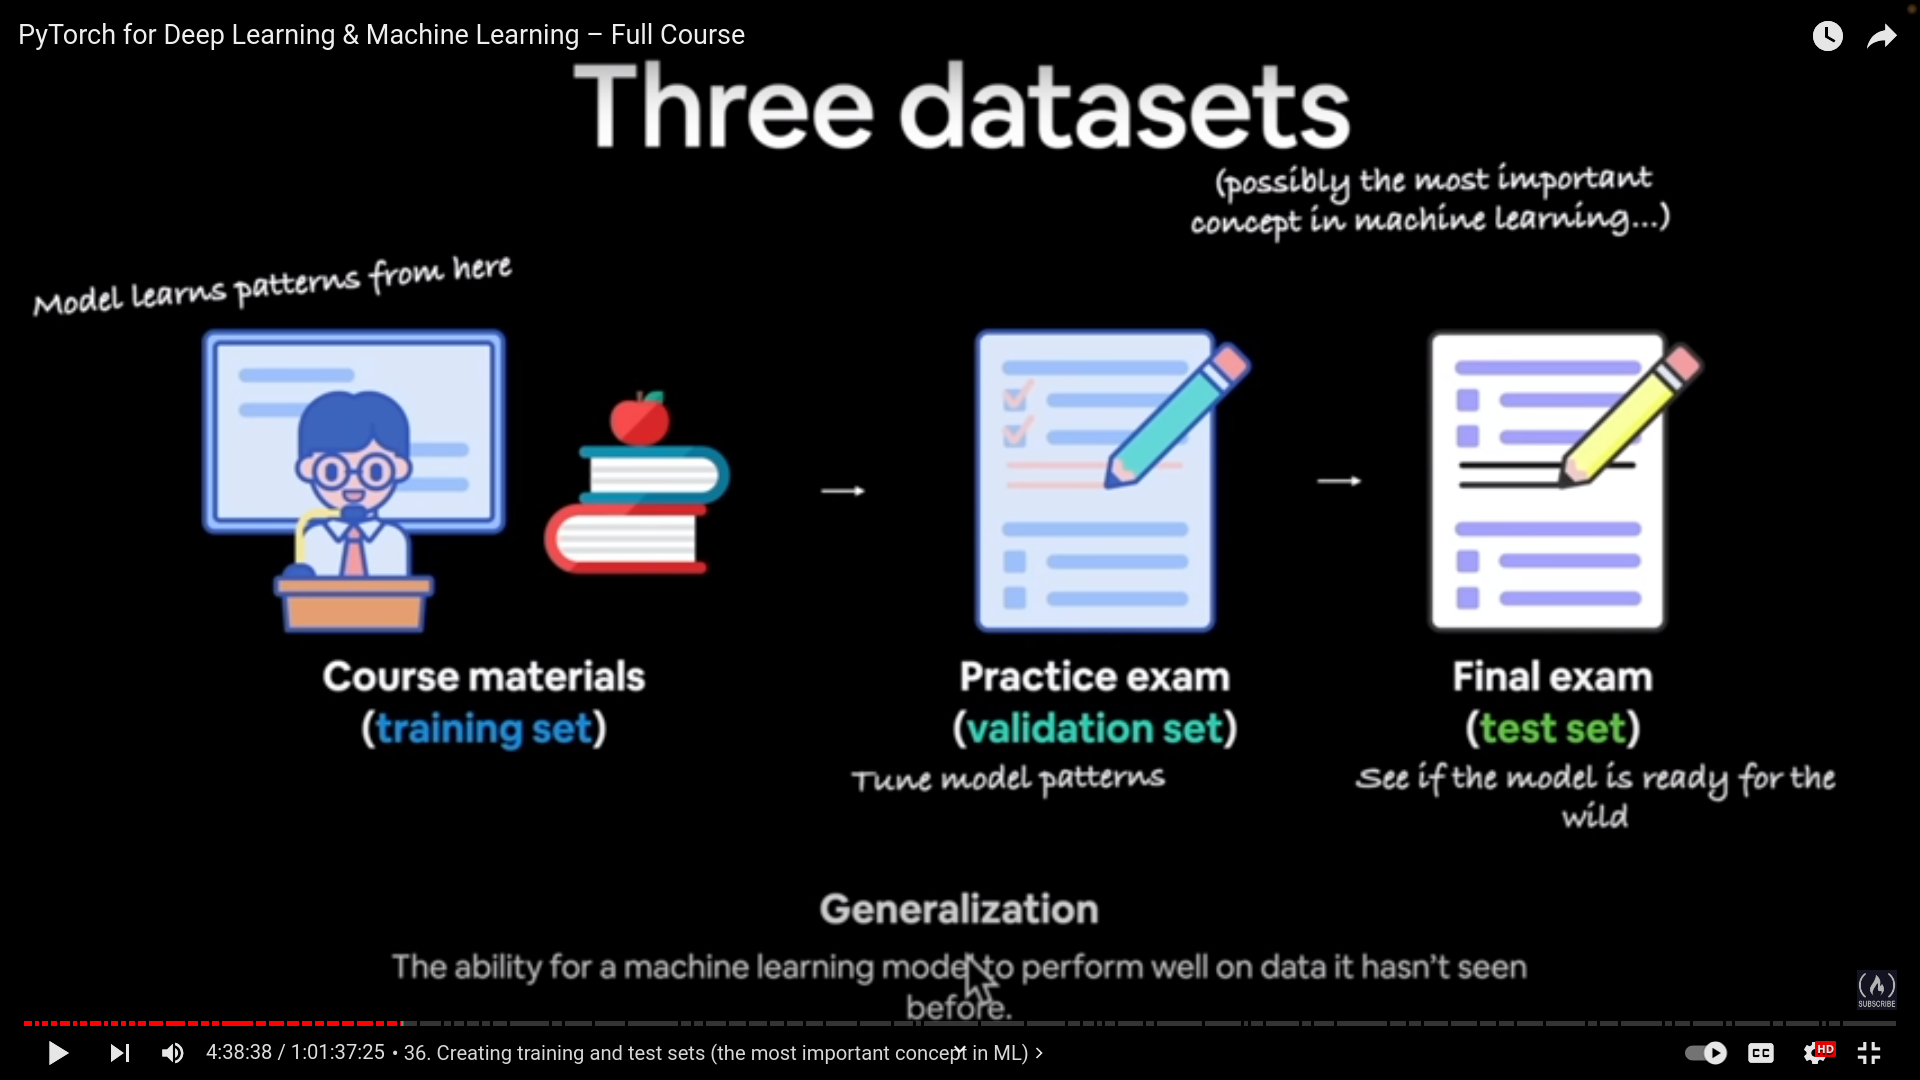

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] # indexing from split onwards

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Wonderful, we've got 40 samples for training (`X_train` & `y_train`) and 10 samples for testing (`X_test` & `y_test`).

The model we create is going to try and learn the _relationship_ between `X_train` & `y_train` and then we will _evaluate_ what it has learned on `X_test` and `y_test`.

But right now our data is just numbers on a page. How might we better visualize our data? This is where the data explorer's motto comes in!

"Visualize, visualize and visualize!"

Let's create a function to visualize it.

Docstring was added to be nice and Pythonic.

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # blue

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data") # green

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") # red

  # Show the legend
  plt.legend(prop={"size": 14});

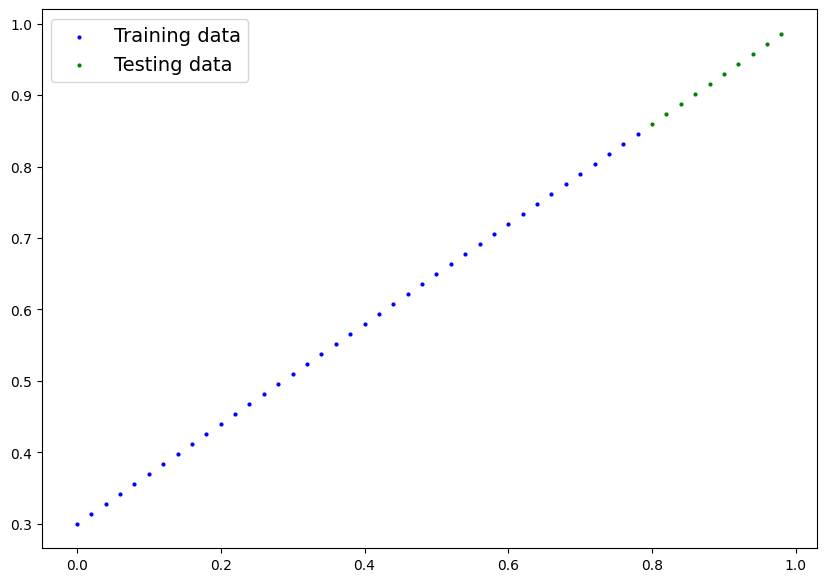

In [ ]:
plot_predictions();

Epic!

Now instead of just being numbers on a page, our data is a straight line.

> **Note:** Now's a good time to introduce you to the data explorer's motto... "visualize, visualize, visualize!"
>
> Think of this whenever you're working with data and turning it into numbers, if you can visualize something, it can _do wonders_ for _understanding_.
>
> Machines love numbers and we humans like numbers too but we also like to look at things.

## 2. Build model

Now we've got some data, let's build a model to use the blue dots to predict the green dots.

We're going to jump right in.

We'll write the code first and then explain everything.

Let's replicate a standard linear regression model using _pure_ PyTorch.

In [ ]:
from torch import nn

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network Lego blocks)
    def __init__(self): # constructor through __init__() method with self as parameter
        super().__init__()

        # parameters instantiated as random values
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float32), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward() method defines the computation (computational graph) of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

Alright there's a fair bit going on above but let's break it down bit by bit.

> **Resource:** We'll be using Python classes to create bits and pieces for building neural networks. If you're unfamiliar with Python class notation, I'd recommend reading [Real Python's Object Orientating programming (OOP) in Python 3 guide](https://realpython.com/python3-object-oriented-programming/) a few times.

A lot of PyTorch uses Object Oriented Programming (OOP).

What our model does:
* Start with random parameter values, i.e. `weights` and `bias`.
* Look at training data and ajust the random param values to better represent (or get closer) to the ideal values (weights & bias values we used to create the data, i.e. the __ground truth__).

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

As we go forward, a lot of what PyTorch is doing behind the scenes is to taking care of above two algorithms for us.

Hightly recommended to watch the entire seires of 3Blue1Brown on Deep Learning.

### PyTorch model building essentials

PyTorch has FOUR (give or take) _essential modules_ you can use to create _almost any kind_ of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains _all_ of the __building blocks__ for __computational graphs__ (essentially a _series_ of computations executed in a particular way and a neural network can be considered a computational graph). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | _Stores tensors_ that can be used with `nn.Module`. If `requires_grad=True` gradients (used for __updating__ model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)) are calculated _automatically_, this is often referred to as "__autograd__".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The _base class_ for _all_ neural network modules, _all_ the _building blocks_ for neural networks are `subclasses`. If you're building a neural network in PyTorch, your models should _subclass_ `nn.Module`. __Requires__ a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains _various optimization algorithms_ (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | _All_ `nn.Module` _subclasses_ _require_ a `forward()` method, this _defines_ the computation in the form of computational graph that will _take place_ on the data _passed_ to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, _almost everything_ in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the __larger building blocks__ (_layers_)
* `nn.Parameter` contains the _smaller parameters_ like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (_tensors full of data_) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to _improve_ the _parameters_ within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their uses cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).

Any __subclass__ of `nn.Module`, which is what we have done, requires a `forward()` method. `forward()` defines the computation performed at _every call_ and should bey __overridden__ by __all subclasses__.

If we were to call linear regression model and put some data through it, the `forward()` method is the __operation__ that this module does.


### Checking the contents of a PyTorch model
Now we've got these out of the way, let's create a model _instance_ with the class we've made and check its parameters using [`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters).

In [ ]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42) # DB loves 42 - it's the answer to the universe

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters()) # Generator object turned into a list

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model contains) of the model using [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Notice how the values for `weights` and `bias` from `model_0.state_dict()` come out as _random_ float tensors?

This is because we _initialized_ them above using `torch.randn()`.

Essentially, we want to _start_ from __random__ parameters and get the model to __update__ them towards parameters that _fit_ our data best (the hardcoded `weight` and `bias` values we set when creating our straight line data).

> **Exercise:** Try changing the `torch.manual_seed()` value two cells above, see what happens to the weights and bias values.

Because our model starts with random values, right now it'll have poor predictive power.

The entire foundation of Deep Learning is to start with random values, then use gradient descent and backpropagation plus whatever data we are working with to move these random values as close as possible to the ideal values (i.e. __ground truth__). In most cases, we don't know what the ideal values (ground truth) are.

The __premise__ of Deep Learning is to _start with random values_ and make them more _representative_, closer to __ground truth__.

### Making predictions using `torch.inference_mode()`
To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.

When we pass data to our model, it'll _go through_ the model's `forward()` method and produce a result using the computation we've defined through the computational graph.

Let's make some predictions.

In [ ]:
y_preds = model_0(X_test)
y_preds # notice the presence of `grad_fn`

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

Hmm?

You probably noticed we used [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) as a [context manager](https://realpython.com/python-with-statement/) (that's what the `with torch.inference_mode():` is) to make the predictions.

As the name suggests, `torch.inference_mode()` is used when using a model for _inference_ (making predictions).

`torch.inference_mode()` _turns off_ a bunch of things (like _gradient tracking_, which is necessary for training but not for inference) to make **forward-passes** (data going through the `forward()` method) faster because PyTorch keeps track of less data during inference mode.

> **Note:** In older PyTorch code, you may also see `torch.no_grad()` being used for inference. While `torch.inference_mode()` and `torch.no_grad()` do similar things,
`torch.inference_mode()` is newer, _potentially faster_ and _preferred_. See this [Tweet from PyTorch](https://twitter.com/PyTorch/status/1437838231505096708?s=20) for more.

We've made some predictions, let's see what they look like.

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


Notice how there's one prediction value per testing sample.

This is because of the kind of data we're using. For our straight line, one `X` value maps to one `y` value.

However, machine learning models are very flexible. You could have 100 `X` values mapping to one, two, three or 10 `y` values. It all depends on what you're working on.

Our predictions are still numbers on a page, let's visualize them with our `plot_predictions()` function we created above.

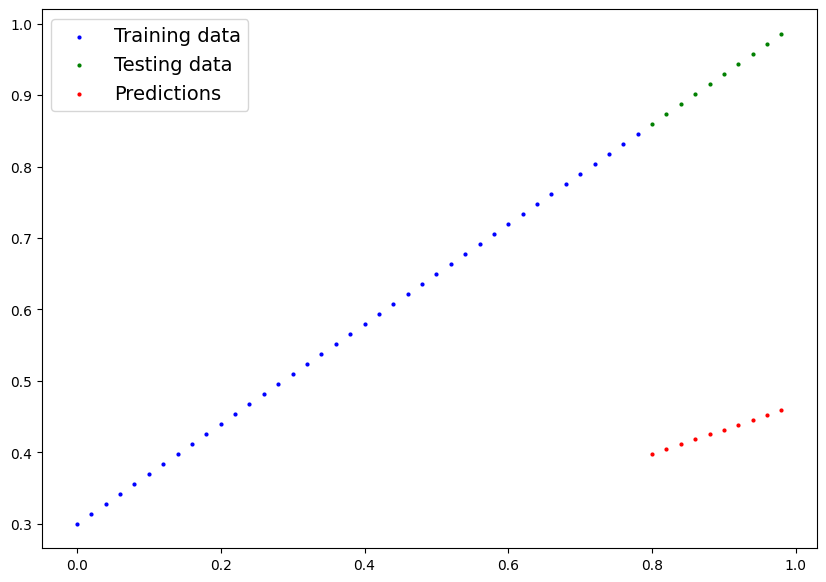

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

Woah! Those predictions look pretty bad...

This make sense though when you remember our model is just using _random_ parameter values to make predictions.

It hasn't even looked at the blue dots to try to predict the green dots.

Time to change that.

## 3. Train model

Right now our model is making predictions using _random_ parameters to make calculations, it's basically _guessing_ (_randomly_).

To fix that, we can _update_ its _internal parameters_ (I also refer to *parameters* as _patterns_), the `weights` and `bias` values we _set randomly_ using `nn.Parameter()` and `torch.randn()` to be something that _better represents_ the input data.

We could hard code this (since we know the default values `weight=0.7` and `bias=0.3`) but where's the fun in that?

Much of the time you won't know what the _ideal_ parameters (i.e. __ground truth__) are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.

The whole idea of _training_ is for a model to move from some _unknown_ parameters (these may be initialised randomly) to some _known_ parameters.

In other words, from a _poor_ representation of the data to a _better_ representation of the data.

One way to meausre how poor/wrong your model predictions are is to use a loss function.

__Note__: Loss function may also be called _cost function_ or _criterion_ in different areas. In our case, we're going to refer to it as a loss function.

In [ ]:
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

### Creating a loss function and optimizer in PyTorch

For our model to _update_ its _parameters on its own_, we'll need to add a few more things to our __recipe__.

And that's a **loss function** as well as an **optimizer**.

The rolls of these are:

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how _wrong_ your models predictions (e.g. `y_preds`) are compared to the _ground truth labels_ (e.g. `y_test`). Lower the better. | PyTorch has plenty of _built-in_ loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Takes into account of the loss function and _adjusts_ model's parameters (e.g. weights & biases). Tells your model how to _update_ (__nudge__) its internal parameters to lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

Let's create a loss function and an optimizer to help improve our model.

The loss function and optimizer depend on what kind of problem you're working on.

However, there are some common values, that are known to work well, such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss()` recommended) in PyTorch as our loss function.

![what MAE loss looks like for our plot data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)
*Mean absolute error (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.*

And we'll use SGD, `torch.optim.SGD(params, lr)` where:

* `params` is the target model's parameters you'd like to optimize (e.g. the random `weights` and `bias` values we set before).
* `lr` is the **learning rate** you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is _considered_ a **hyperparameter** (because it's set by a human such as machine learning engineer and cannot be learned directly from data). Common starting values for the learning rate are `0.01`, `0.001`, `0.0001`, however, these can also be _adjusted over time_ (this is called [learning rate _scheduling_](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

Woah, that's a lot, let's see it in code.

__Note:__ loss function and optimizer work in _tandem_ and that's why we define them together in a single step.

This is one of the occasions when ML is part art, part science - trial & error to figure out what works the best for your problem at hand.


In [ ]:
# Check out model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss() # L1Loss <=> MAE loss

# Create the optimizer
# Stochastic Gradient Descent (SGD)
# lr = learning rate, possibly the most important hyperparameter
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [ ]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Creating an optimization loop in PyTorch

Woohoo! Now we've got a loss function and an optimizer, it's now time to create a **training loop** (and **testing loop**).

The training loop involves the model going through the training data and learning the _relationships_ between the `features` and `labels`.

The testing loop involves going through the testing data and _evaluating_ how good the _patterns_ are that the model learned on the training data (the model never sees the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

To create these we're going to write a Python `for` loop in the theme of the [unofficial PyTorch optimization loop song](https://twitter.com/mrdbourke/status/1450977868406673410?s=20) (there's a [video version too](https://youtu.be/Nutpusq_AFw)).

![the unofficial pytorch optimization loop song](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-optimization-loop-song.png)
*The unoffical PyTorch optimization loops song, a fun way to remember the steps in a PyTorch training (and testing) loop.*

There will be a fair bit of code but nothing we can't handle.

__PA__ + __CTD__

Familiarize yourself with the __boilerplate__ code below - it outlines the critical steps of building a model in PyTorch. So the backbone of the boilerplate can be __functionised__ and __fine-tuned__ first then adopted in our own work with PyTorch.

### PyTorch training loop
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 0 | Looping through the (training) data | | |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the __ground truth__ and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are _accumulated_ by default) so they can be _recalculated_ for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform _backpropagation_ on the loss | Computes the gradient of the loss with respect to _every model parameter_ to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update/adjust the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
>
> And on the ordering of things, the above is a good _default_ order but you may see slightly different orders. Some rules of thumb:
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* stepping them (`optimizer.step()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.


### PyTorch testing loop

As for the testing loop (evaluating our model), the typical steps include:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through _all_ of the training data once, performing its `forward()` function calculations. | `model(x_test)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the __ground truth__ and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_test)` |
| 3 | Calulate evaluation metrics (optional) | Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. | Custom functions |

Notice the testing loop doesn't contain performing backpropagation (`loss.backward()`) or stepping the optimizer (`optimizer.step()`), this is because no parameters in the model are being changed/updated during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.

![pytorch annotated testing loop](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

Let's put all of the above together and train our model for 100 **epochs** (forward passes through the data) and we'll evaluate it every 10 epochs.

__PA + CTD__

Below is literally the __crux__ of how our model learns. The beauty of PyTorch is that it performs _backpropagation_ and _gradient descent_ for us.

As part of its workflow (training & evaluating), PyTorch creates something similar to a gradient descent curve, not visually but mathematically, behind the scenes for every (trainable/learnable) parameter. If your model has gazillion parameters to learn/train, there is no way we could just create all of these gradient curves for each parameter ourselves - that's the beauty of PyTorch and it's doing this behind the scenes through a mechanism called `autograd` (auto-gradient calculation).

Below is literally how a model learns patterns from data.

`model.train()` and `model.eval()` are the _entry points_ for training and testing/evaluating mode respectively - make calling them a __habit__.

`torch.inference_mode()` is `torch.no_grad()` on __steroids__.

Training a model + evaluating it are seriously the most fundamental steps of Deep Learning with PyTorch.

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data/set)
epochs = 200 # no. of passes over training set

# Create empty lists to store useful values that are helpful for tracking model performance
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Trainin

    # Put model in training mode (this is the default state of a model)
    model_0.train() # the entry point of training mode/ground - intialisation

    # 1. Forward pass on training data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad() # start fresh each iteration of the loop

    # 4. Loss backwards - perform backpropagation on the loss w.r.t. the model parameters
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so we have to zero them above (in step 3) for the next iteration of the loop

    ### Testing

    # Put the model in evaluation mode
    # The entry point of testing/evaluation mode
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)

    # torch.no_grad() might be seen in older PyTorch code
    with torch.inference_mode(): # context manager: inference_mode() turns off gradient tracking & a couple of more things behind the scenes that are not need in testing
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening at every x epoch
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy()) # look up .detach() https://pytorch.org/docs/stable/generated/torch.Tensor.detach.html
            test_loss_values.append(test_loss.detach().numpy())

            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")
            print(f'Params: {model_0.state_dict()}')

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Params: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Params: OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Params: OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Params: OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Params: OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Params: OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:

Oh would you look at that! Looks like our loss is going down with every epoch, let's plot it to find out.

Reminder - data explorer's motto: visualize, visualize and visualize!

One of the most beautiful scenes in machine learning is declining loss curve. The two loss curves crossing at some point is a sign that our model is _converging_ and the loss is getting close to zero as it possibly can.

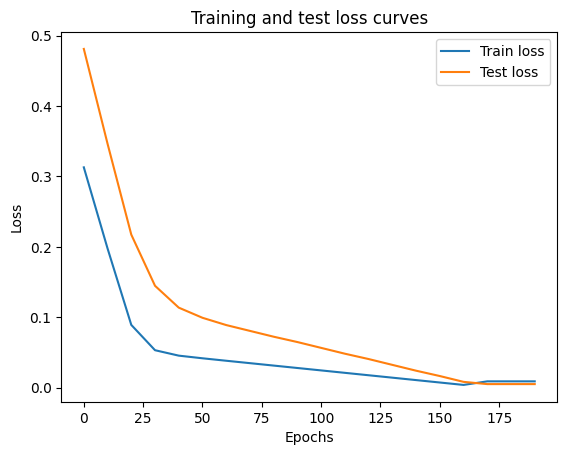

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")

plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Nice! The **loss curves** show the loss going down over time. Remember, loss is the measure of how *wrong* your model is, so the lower the better.

But why did the loss go down?

Well, thanks to our loss function and optimizer, the model's internal parameters (`weights` and `bias`) were updated to better reflect the underlying patterns in the data.

Let's inspect our model's [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html) to see see how close our model gets to the original values we set for weights and bias.



In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Wow! How cool is that?

Our model got very close to calculating the exact original values for `weight` and `bias` (and it would probably get even closer if we trained it for longer).

> **Exercise:** Try changing the `epochs` value above to 200, what happens to the _loss curves_, the weights and bias parameter values of the model?

It'd likely never guess them *perfectly* (especially when using more complicated datasets) but that's okay, often you can do very cool things with a close _approximation_.

This is the whole idea (i.e. __crux__) of machine learning and deep learning, **there are some ideal values that describe our data** and rather than figuring them out _by hand_, **we can train a model to figure them out programmatically**.

## 4. Making predictions with a trained PyTorch model (inference)

Once you've trained a model, you'll likely want to make predictions with it.

We've already had a _glimpse_ of this in the training and testing code above, the steps to do it _outside_ of the training/testing loop are similar.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

1. Set the model in __evaluation__ mode (`model.eval()`).
2. Make the predictions using the __inference__ mode __context manager__ (`with torch.inference_mode(): ...`).
3. All predictions should be made with objects on the _same device_ (e.g. both data and model on GPU only or on CPU only).

The first two items make sure all helpful calculations and settings PyTorch uses behind the scenes during training but aren't necessary for inference are turned off (this results in _faster computation_). And the third ensures that you won't run into __cross-device__ errors.

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

Nice! We've made some predictions with our trained model, now how do they look?

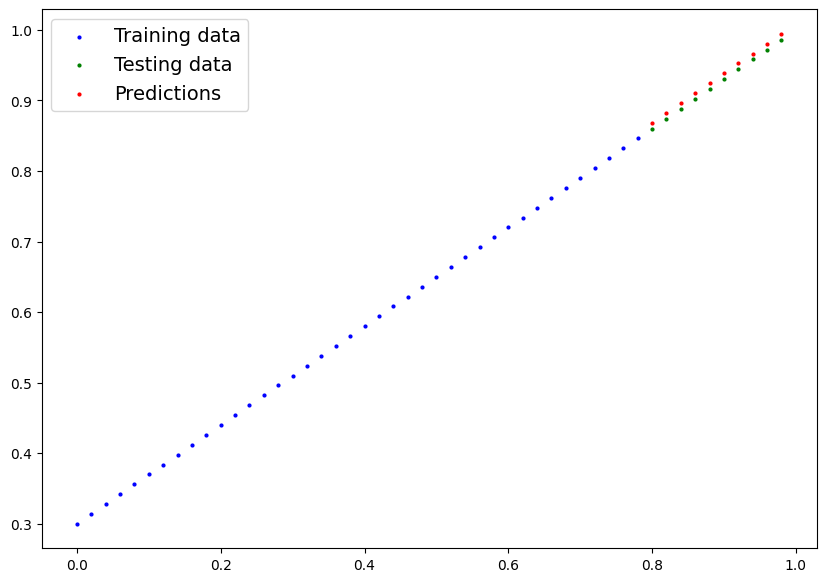

In [ ]:
plot_predictions(predictions=y_preds)

Woohoo! Those red dots are looking far closer than they were before!

Let's get onto saving and reloading a model in PyTorch.

## 5. Saving and loading a PyTorch model

If you've trained a PyTorch model (epecially a large one), chances are you'll want to save it and _export_ it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your _progress_ on a model then come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| PyTorch method | What does it do? |
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Saves a _serialized object_ to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python _objects_ like dictionaries can be saved using `torch.save`.  |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Uses `pickle`'s unpickling features to _deserialize_ and load pickled Python object files (like models, tensors or dictionaries) into _memory_. You can also set which _device_ to load the object to (CPU, GPU etc). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Loads a model's _parameter dictionary_ (`model.state_dict()`) using a saved `state_dict()` object. |

> **Note:** As stated in [Python's `pickle` documentation](https://docs.python.org/3/library/pickle.html), the `pickle` module **is not secure**. That means you should only ever _unpickle_ (load) data you __trust__. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.

In the future, we may be working with moddels with millions even billions of parameters but the principle of `state_dict()` stays the same, i.e. using Python dictionary objects to hold model states.

### Saving a PyTorch model's `state_dict()`

The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

Let's see how we can do that in a few steps:

1. We'll create a directory for saving models to called `models` using Python's `pathlib` module.
2. We'll create a file path to save the model to.
3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

> **Note:** It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`.


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # A common PyTorch convention is to save models using either .pt or .pth file extension.
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME # pathlib syntax

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict(), i.e. model's learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


__PA + CTD__

* DB also likes to print out things here and there so he knows what's going on.
* The beauty of PyTorch is the __flexibility__ it brings.
* We didn't necessarily have to write all of the `path` style code but it's handy for later on if we want to __functionize__ the code for reproducibility.

In [ ]:
# Check the saved file path
# !ls -lh models
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1207 Aug 26 04:13 models/01_pytorch_workflow_model_0.pth


### Loading a saved PyTorch model's `state_dict()`

Since we've got a saved model `state_dict()` at `models/01_pytorch_workflow_model_0.pth`, we can now load it in using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`.

Why call `torch.load()` inside `torch.nn.Module.load_state_dict()`?

Because we only saved the model's `state_dict()` which is a `dictionary` _object_ of __learned parameters__ and not the *entire* model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a __new instance__ of our model (which is a _subclass_ of `nn.Module`).

Why not save the entire model?

[Saving the entire model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more _intuitive_, however, to quote the PyTorch documentation (italics mine):

> The disadvantage of this approach *(saving the entire model)* is that the _serialized_ data is _bound_ to the _specific classes_ and the exact directory structure used when the model is saved...
>
> Because of this, your code can break in various ways when used in other projects or after _refactors_.

So instead, we're using the __flexible__ method of saving and loading just the `state_dict()`, which again is basically a _dictionary_ of model parameters.

Let's test it out by created another _instance_ of `LinearRegressionModel()`, which is a _subclass_ of `torch.nn.Module` and will hence have the _built-in_ method `load_state_dict()`.

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel() # subclass of nn.Module

print(loaded_model_0.state_dict()) # initialized with random parameters at this stage
print(model_0.state_dict()) # in comparision

# Load the state_dict of our saved model (this will update the new instance of our model with trained/learned weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) # LinearRegressionModel() is a subclass of nn.Module

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


<All keys matched successfully>

Excellent! It looks like things matched up.

Now to test our loaded model, let's perform inference with it (i.e. make predictions) on the test data.

Remember the rules for performing inference with PyTorch models?

If not, here's a refresher:

<details>
    <summary>PyTorch inference rules</summary>
    <ol>
      <li> Set the model in evaluation mode (<code>model.eval()</code>). </li>
      <li> Make the predictions using the inference mode context manager (<code>with torch.inference_mode(): ...</code>). </li>
      <li> All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).</li>
    </ol>
</details>



In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

Now we've made some predictions with the loaded model, let's see if they're the same as the previous predictions.

In [ ]:
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Nice!

It looks like the loaded model predictions are exactly the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

> **Note:** There are more methods to save and load PyTorch models but I'll leave these for extra-curriculum and further reading. See the [PyTorch guide for saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models) for more.

## 6. Putting it all together

We've covered a fair bit of ground so far.

But once you've had some practice, you'll be performing the above steps like dancing down the street.

Speaking of practice, let's put everything we've done so far together.

Except this time we'll make our code __device agnostic__ (so if there's a GPU available, it'll use it and if not, it will default to the CPU).

There'll be far less commentary in this section than above since what we're going to go through has already been covered.

We'll start by importing the standard libraries we need.

> **Note:** If you're using Google Colab, to setup a GPU, go to Runtime -> Change runtime type -> Hardware acceleration -> GPU. If you do this, it will _reset_ the Colab runtime and you will _lose_ saved variables.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Now let's start making our code device agnostic by setting `device="cuda"` if it's available, otherwise it'll _default_ to `device="cpu"`.



In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


If you've got access to a GPU, the above should've printed out:

```
Using device: cuda
```
Otherwise, you'll be using a CPU for the following computations. This is fine for our small dataset but it will take far longer for larger datasets.

In [ ]:
!nvidia-smi

Sat Aug 26 04:13:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    31W /  70W |    821MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1 Data

Let's create some data just like before.

First, we'll hard-code some `weight` and `bias` values.

Then we'll make a range of numbers between 0 and 1, these will be our `X` values.

Finally, we'll use the `X` values, as well as the `weight` and `bias` values to create `y` using the linear regression formula (`y = weight * X + bias`).

In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
# X is captal because typically X is a feature matrix
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
X.size(), X.shape, len(X), y.size(), y.shape, len(y)

(torch.Size([50, 1]),
 torch.Size([50, 1]),
 50,
 torch.Size([50, 1]),
 torch.Size([50, 1]),
 50)

Wonderful!

Now we've got some data, let's _split_ it into training and test sets.

We'll use an 80/20 split with 80% training data and 20% testing data.

In [ ]:
# Split data
train_split = int(0.8 * len(X)) # len() appears to apply to dim 0 which is convenient
X_train, y_train = X[:train_split], y[:train_split] # index on data
X_test, y_test = X[train_split:], y[train_split:] # complement/opposite split

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

__PA + CTD__

With data created, has it been turned into tensors yet? Oh yes because we use PyTorch to create it.
> Reminder: the only __currency__ in Deep Learning is _tensor_; PyTorch is the new _Excel_ and its users are the new accountants.

Excellent, let's visualize them to make sure they look okay.

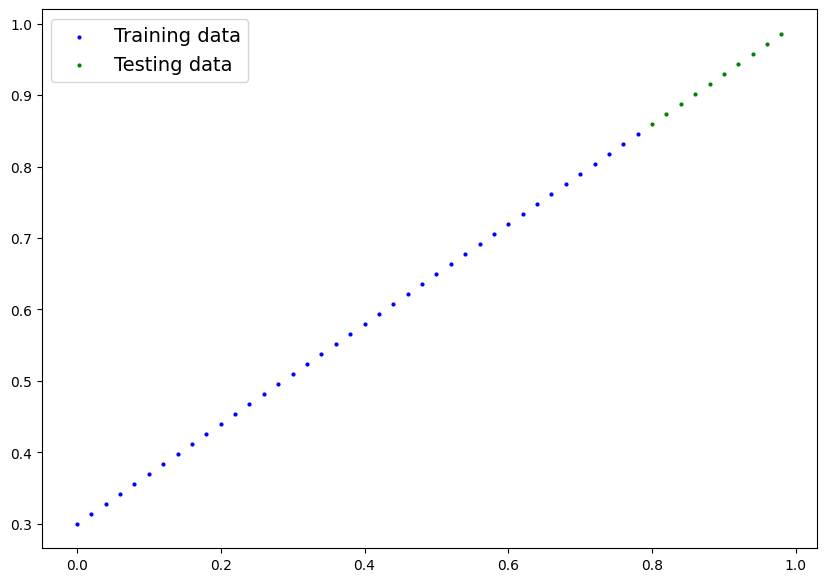

In [ ]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

We've got some data, now it's time to make a model.

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using `nn.Parameter()`, we'll use [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) to do it for us.

Where `in_features` is the number of dimensions your input data has and `out_features` is the number of dimensions you'd like it to be output to.

In our case, both of these are `1` since our data has `1` input feature (`X`) per label (`y`).

![comparison of nn.Parameter Linear Regression model and nn.Linear Linear Regression model](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)
*Creating a linear regression model using `nn.Parameter` versus using `nn.Linear`. There are plenty more examples where the `torch.nn` module has pre-built computations, including many popular and useful neural network layers.*

__PA + CTD__
> Exactly why Deep Neural Nets are the new Lego and PyTorch is by far the most powerful tool to build Legos.

> Object Oriented Programming (OOP) is the most systematic and structured way of playing with Lego pieces. This is why neural networks are implemented with OOP in PyTorch.

> PyTroch revives my passion for OOP after years' of search for its practical and good use cases, in addition to conventional programming.

> Trouble-shooting _on the fly_ is a great and valuable skill to have: dunder method (i.e. `__init__()` or the constructor function) had an extra undersore so it was never actually constructing.

> PyTorch (`torch.nn`) has pre-built implementations for all of the common __layers__ in Deep Learning are different _mathematical transformations_.

In [ ]:
# Subclassing nn.Module to create a new version of the model, more PyTroch native
class LinearRegressionModelV2(nn.Module): # subclassing is the key when building neural nets with PyTorch
    def __init__(self): # standard constructor: dunders
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear( # also called linear transform, probing layer, fully connected layer and dense layer (in tf)
            in_features=1,
            out_features=1,
        )

    # Define/overwrite the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor: # using Python's type annotation/hint; x is conventional var for input data
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In above snippet, the input and output shapes/sizes of your layer _correpond to_ what data goes _in) and _out_ of the __computational units__, e.g. neuron, layer and even model. These values will be highly dependent on the data you are working with.

__PA + CTD__
> One of the major chanllenges when it comes to Deep Learning (building deep neural nets in particular) is to keep track of __meta-data__ such as dimensions, tensor shapes/sizes.

> A big piece of the PyTorch puzzle is we don't need to initializing model parameters ourselves. We as users generally initialize __layers__ which are later used in forward pass.

Notice the outputs of `model_1.state_dict()`, the `nn.Linear()` layer created a _random_ `weight` and `bias` parameter for us.

Now let's put our model onto the GPU (if it's available).

We can change the device our PyTorch objects are on using `.to(device)`.

First let's check the model's current device.

In [ ]:
# Check model device so that we can write device agnostic code
next(model_1.parameters()).device

device(type='cpu')

Wonderful, looks like the model's on the CPU by default.

Let's change it to be on the GPU (if it's available).

In [ ]:
# Set model to target device (e.g GPU) if it's availalble, otherwise it'll default to CPU
# It may take a little bit longer while the GPU gets fired/warmed up.
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

Nice! Because of our __device agnostic__ code, the above cell will work regardless of whether a GPU is available or not.

If you do have access to a _CUDA-enabled_ GPU, you should see an output of something like:

```
device(type='cuda', index=0)
```

### 6.3 Training

Time to build a training and testing loop.

First we'll need a _loss function_ and an _optimizer_.

Let's use the same functions we used earlier, `nn.L1Loss()` and `torch.optim.SGD()`.

We'll have to pass the new model's parameters (`model.parameters()`) to the optimizer for it to _adjust_ them during training.

The learning rate of `0.01` worked well before too so let's use that again.




In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
# Create loss function
loss_fn = nn.L1Loss() # same as MAE

# Create optimizer
optimizer = torch.optim.SGD(
  params=model_1.parameters(), # optimize newly created model's parameters
  lr=0.01,
)

Beautiful, loss function and optimizer ready, now let's train and evaluate our model using a training and testing loop.

The only different thing we'll be doing in this step compared to the previous training loop is putting the data on the target `device`.

We've already put our model on the target `device` using `model_1.to(device)`.

And we can do the same with the data.

That way if the model is on the GPU, the data is on the GPU (and vice versa).

Let's step things _up a notch_ this time and set `epochs=1000`.

If you need a _reminder_ of the PyTorch training loop steps, see below.

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available target device with device agnostic code
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # training mode is on by default after construction

    # 1. Forward pass: making predictions
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward, i.e. performing backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step() # because by default, optimizer accumulates gradients behind the scenes

    ### Testing
    # Good practice
    model_1.eval() # put the model in evaluation mode for testing (inference), turning off things like dropout and batch normalization layers

    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


> **Note:** Due to the random nature of machine learning, you will likely get slightly different results (different loss and prediction values) depending on whether your model was trained on CPU or GPU. This is true even if you use the same random seed on either device. If the difference is large, you may want to look for errors, however, if it is small (ideally it is), you can ignore it.

Nice! That loss looks pretty low.

Let's check the parameters our model has learned and compare them to the original parameters we hard-coded.

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Ho ho! Now that's pretty darn close to a perfect model.

Remember though, in practice, it's extremely rare that you'll know the perfect parameters ahead of time.

And if you knew the parameters your model had to learn ahead of time, what would be the fun of machine learning?

Plus, in many real-world machine learning problems, the number of parameters can well exceed tens of millions, even billions in the case of LLMs.

I don't know about you but I'd rather write code for a computer to figure those out rather than doing it by hand.

### 6.4 Making predictions

Now we've got a trained model, let's turn on it's evaluation mode and make some predictions.

In [ ]:
# Turn model into evaluation mode - let it become a habit
model_1.eval()

# Make predictions on the test data
with torch.inference_mode(): # context manager
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

If you're making predictions with data on the GPU, you might notice the output of the above has `device='cuda:0'` towards the end. That means the data is on CUDA device 0 (the first GPU your system has access to due to zero-indexing), if you end up using multiple GPUs in the future, this number may be higher.

Now let's plot our model's predictions.

> **Note:** Many data science libraries such as pandas, matplotlib and NumPy aren't capable of using data that is stored on GPU. So you might run into some issues when trying to use a function from one of these libraries with tensor data not stored on the CPU. To fix this, you can call [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) on your _target tensor_ to return a _copy_ of your target tensor on the CPU.

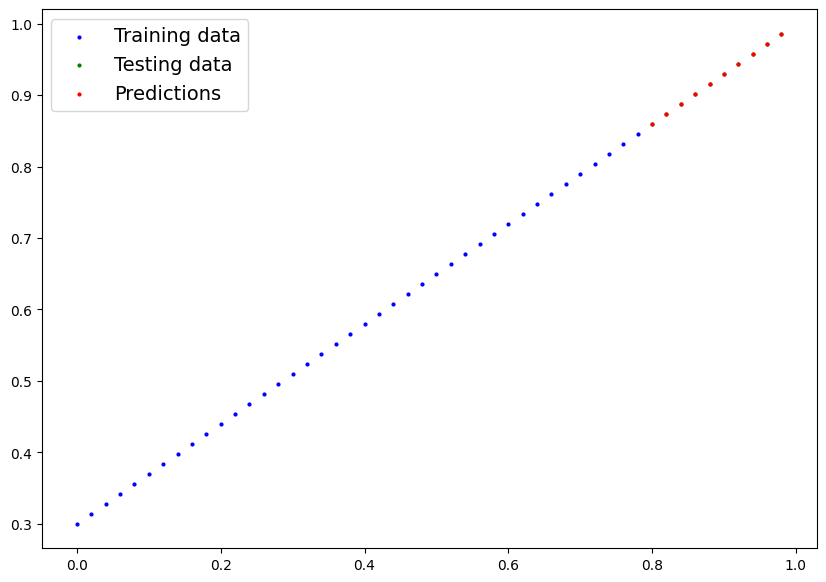

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

Woah! Look at those red dots (predictions), they _line up_ almost perfectly with the green dots. I guess the extra epochs helped.



### 6.5 Saving and loading a model

We're happy with our models predictions, so let's save it to file so it can be used later.



In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


And just to make sure everything worked well, let's load it back in.

We'll:
* Create a new instance of the `LinearRegressionModelV2()` class
* Load in the model state dict using `torch.nn.Module.load_state_dict()`
* Send the new instance of the model to the target device (to ensure our code is device-agnostic)

In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")
print(loaded_model_1.state_dict())

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])


Now we can evaluate the loaded model to see if its predictions line up with the predictions made prior to saving.

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds # Tensor element-wise comparison

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Everything adds up! Nice!

Well, we've come a long way. You've now built and trained your first two neural network models in PyTorch!

Time to practice your skills.

## Exercises

All exercises have been inspired from code throughout the notebook.

There is one exercise per major section.

You should be able to complete them by referencing their specific section.

> **Note:** For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.
3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

> **Resource:** See the [exercises notebooks templates](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/exercises) and [solutions](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) on the course GitHub.

## Extra-curriculum
* Listen to [The Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw) (to help remember the steps in a PyTorch training/testing loop).
* Read [What is `torch.nn`, really?](https://pytorch.org/tutorials/beginner/nn_tutorial.html) by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works.
* Spend 10-minutes scrolling through and checking out the [PyTorch documentation cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html) for all of the different PyTorch modules you might come across.
* Spend 10-minutes reading the [loading and saving documentation on the PyTorch website](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to become more familiar with the different saving and loading options in PyTorch.
* Spend 1-2 hours read/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
 * [Wikipedia page for gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)
 * [Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) by Robert Kwiatkowski
 * [Gradient descent, how neural networks learn video](https://youtu.be/IHZwWFHWa-w) by 3Blue1Brown
 * [What is backpropagation really doing?](https://youtu.be/Ilg3gGewQ5U) video by 3Blue1Brown
 * [Backpropagation Wikipedia Page](https://en.wikipedia.org/wiki/Backpropagation)
